# Computation of NPP signal to noise ratio in 30 year windows

### UKESM model output

Steps:
- Load the data
- Define the signal to noise function
- Using a 30 year moving window (for loop) to calculate the signal:noise ratio at each grid cell at each year

**Import packages**

In [33]:
!pwd

import numpy as np
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import seaborn as sb
sb.set(style='ticks')


/home/users/train013/CMIP6_hackathon


**Import the pre-processed data**

In [34]:
### UKESM
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_UKESM1-0-LL_historical_r1i1p1f2_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_UKESM1-0-LL_ssp585_r1i1p1f2_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
lon = data.variables['ETOPO60X'][...]
lat = data.variables['ETOPO60Y'][...]
month = data.variables['time'][...]
years = np.arange(1850.5,2100.6,1)
ukesm_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

'''
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_ACCESS-ESM1-5_ssp585_r1i1p1f1_201501-230012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
access_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CanESM5_historical_r1i1p2f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CanESM5_ssp585_r1i1p2f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
canesm_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CESM2_historical_r4i1p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CESM2_ssp585_r4i1p1f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
cesm_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CNRM-ESM2-1_historical_r1i1p1f2_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CNRM-ESM2-1_ssp585_r1i1p1f2_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
cnrm_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_GFDL-CM4_historical_r1i1p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_GFDL-CM4_ssp585_ri1p1f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
gfdlcm4_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_GFDL-ESM4_historical_r1i1p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_GFDL-ESM4_ssp585_r1i1p1f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
gfdlesm4_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
ipsl_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_MIROC-ES2L_historical_r1i1p1f2_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_MIRIC-ES2L_ssp585_r1i1p1f2_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
miroc_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_MRI-ESM2-0_historical_r1i2p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_MRI-ESM2-0_ssp585_r1i2p1f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
mri_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_NorESM2-LM_historical_r1i1p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_NorESM2-LM_ssp585_r1i1p1f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
noresm_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

print(np.shape(access_npp))
print(np.shape(canesm_npp))
print(np.shape(cesm_npp))
print(np.shape(cnrm_npp))
print(np.shape(gfdlcm4_npp))
print(np.shape(gfdlesm4_npp))
print(np.shape(ipsl_npp))
print(np.shape(miroc_npp))
print(np.shape(mri_npp))
print(np.shape(noresm_npp))
print(np.shape(ukesm_npp))


print(np.shape(lon))
print(np.shape(lat))
print(np.shape(month))
'''

"\ndata = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_185001-201412_yearmonths.nc')\nhist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1\ndata = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_ACCESS-ESM1-5_ssp585_r1i1p1f1_201501-230012_yearmonths.nc')\nssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1\naccess_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)\n\ndata = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CanESM5_historical_r1i1p2f1_185001-201412_yearmonths.nc')\nhist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1\ndata = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CanESM5_ssp585_r1i1p2f1_201501-210012_yearmonths.nc')\nssp585_npp = data.variables['intpp'][...]*86400*12  # convert

**Calculate multi-model mean**

In [35]:

print(np.shape(ukesm_npp))


(251, 12, 180, 360)


In [37]:
ukesm_npp_nh = np.ma.average(ukesm_npp[:,5:8,:,:], axis=1)
tmp = np.ma.zeros((251,3,180,360))
tmp[:,0,:,:] = ukesm_npp[:,11,:,:]
tmp[:,1,:,:] = ukesm_npp[:,0,:,:]
tmp[:,2,:,:] = ukesm_npp[:,1,:,:]
ukesm_npp_sh = np.ma.average(tmp, axis=1)

print(np.shape(ukesm_npp_nh))
print(np.shape(ukesm_npp_sh))

### past, present and future conditions for NH and SH summers
ukesm_npp_nh_past = np.ma.average(ukesm_npp_nh[1:51,:,:], axis=0)
ukesm_npp_sh_past = np.ma.average(ukesm_npp_sh[1:51,:,:], axis=0)
ukesm_npp_nh_hist = np.ma.average(ukesm_npp_nh[145:165,:,:], axis=0)
ukesm_npp_sh_hist = np.ma.average(ukesm_npp_sh[145:165,:,:], axis=0)
ukesm_npp_nh_futu = np.ma.average(ukesm_npp_nh[231:251,:,:], axis=0)
ukesm_npp_sh_futu = np.ma.average(ukesm_npp_sh[231:251,:,:], axis=0)

ukesm_npp_nh_histdif = ukesm_npp_nh_hist - ukesm_npp_nh_past
ukesm_npp_sh_histdif = ukesm_npp_sh_hist - ukesm_npp_sh_past
ukesm_npp_nh_futudif = ukesm_npp_nh_futu - ukesm_npp_nh_past
ukesm_npp_sh_futudif = ukesm_npp_sh_futu - ukesm_npp_sh_past


(251, 180, 360)
(251, 180, 360)


**make figure**

"\nax4 = plt.subplot(gs[1,1], projection=proj_sh)\np4 = plt.contourf(lon, lat, ukesm_npp_sh_histdif, transform=ccrs.PlateCarree(), cmap=colmap2, levels=levs2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')\nax4.add_feature(cfeature.LAND, color='silver', zorder=2)\nax4.coastlines(zorder=2)\n\nax5 = plt.subplot(gs[2,0], projection=proj_nh)\np5 = plt.contourf(lon, lat, ukesm_npp_nh_futudif, transform=ccrs.PlateCarree(), cmap=colmap2, levels=levs2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')\nax5.add_feature(cfeature.LAND, color='silver', zorder=2)\nax5.coastlines(zorder=2)\n\nax6 = plt.subplot(gs[2,1], projection=proj_sh)\np6 = plt.contourf(lon, lat, ukesm_npp_sh_futudif, transform=ccrs.PlateCarree(), cmap=colmap2, levels=levs2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')\nax6.add_feature(cfeature.LAND, color='silver', zorder=2)\nax6.coastlines(zorder=2)\n\nplt.subplots_adjust(right=0.85, top=0.95, bottom=0.05, left=0.05, hspace=0.0, wspace=0.02)\n\ncbax1 = f

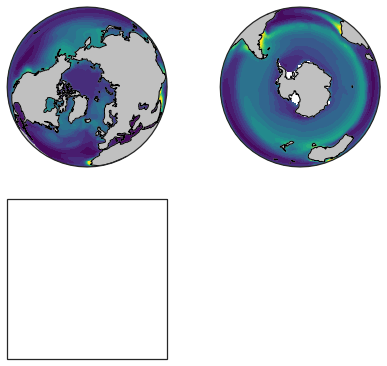

In [45]:
proj_nh = ccrs.Orthographic(central_longitude=-20.0, central_latitude=90.0, globe=None)
proj_sh = ccrs.Orthographic(central_longitude=-20.0, central_latitude=-90.0, globe=None)

levs1 = np.arange(0,21,1)*0.1
levs2 = np.arange(-50,51,5)*0.01

colmap1 = cm.viridis
colmap2 = cm.coolwarm

fstic = 13
fslab = 15

fig = plt.figure(figsize=(7,10))
gs = GridSpec(3,2)

ax1 = plt.subplot(gs[0,0], projection=proj_nh)
p1 = plt.contourf(lon, lat, ukesm_npp_nh_past, transform=ccrs.PlateCarree(), cmap=colmap1, levels=levs1, vmin=np.min(levs1), vmax=np.max(levs1), extend='max')
ax1.add_feature(cfeature.LAND, color='silver', zorder=2)
ax1.coastlines(zorder=2)

ax2 = plt.subplot(gs[0,1], projection=proj_sh)
p2 = plt.contourf(lon, lat, ukesm_npp_sh_past, transform=ccrs.PlateCarree(), cmap=colmap1, levels=levs1, vmin=np.min(levs1), vmax=np.max(levs1), extend='max')
ax2.add_feature(cfeature.LAND, color='silver', zorder=2)
ax2.coastlines(zorder=2)

ax3 = plt.subplot(gs[1,0], projection=proj_nh)
p3 = plt.contourf(lon, lat, ukesm_npp_nh_histdif, transform=ccrs.PlateCarree(), cmap=colmap2, levels=levs2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')
ax3.add_feature(cfeature.LAND, color='silver', zorder=2)
ax3.coastlines(zorder=2)

'''
ax4 = plt.subplot(gs[1,1], projection=proj_sh)
p4 = plt.contourf(lon, lat, ukesm_npp_sh_histdif, transform=ccrs.PlateCarree(), cmap=colmap2, levels=levs2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')
ax4.add_feature(cfeature.LAND, color='silver', zorder=2)
ax4.coastlines(zorder=2)

ax5 = plt.subplot(gs[2,0], projection=proj_nh)
p5 = plt.contourf(lon, lat, ukesm_npp_nh_futudif, transform=ccrs.PlateCarree(), cmap=colmap2, levels=levs2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')
ax5.add_feature(cfeature.LAND, color='silver', zorder=2)
ax5.coastlines(zorder=2)

ax6 = plt.subplot(gs[2,1], projection=proj_sh)
p6 = plt.contourf(lon, lat, ukesm_npp_sh_futudif, transform=ccrs.PlateCarree(), cmap=colmap2, levels=levs2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')
ax6.add_feature(cfeature.LAND, color='silver', zorder=2)
ax6.coastlines(zorder=2)

plt.subplots_adjust(right=0.85, top=0.95, bottom=0.05, left=0.05, hspace=0.0, wspace=0.02)

cbax1 = fig.add_axes([0.9, 0.7, 0.05, 0.2])
cbar1 = plt.colorbar(p1, cax=cbax1, orientation='vertical', ticks=levs1[::2])
cbar1.ax.set_ylabel('NPP (g C m$^{-2}$ day$^{-1}$)', fontsize=fslab)
cbar1.ax.tick_params(labelsize=fstic)

cbax2 = fig.add_axes([0.9, 0.4, 0.05, 0.2])
cbar2 = plt.colorbar(p3, cax=cbax2, orientation='vertical', ticks=levs2[::2])
cbar2.ax.set_ylabel('$\Delta$NPP (1995-2014)', fontsize=fslab)
cbar2.ax.tick_params(labelsize=fstic)

cbax3 = fig.add_axes([0.9, 0.1, 0.05, 0.2])
cbar3 = plt.colorbar(p5, cax=cbax3, orientation='vertical', ticks=levs2[::2])
cbar3.ax.set_ylabel('$\Delta$NPP (2081-2100)', fontsize=fslab)
cbar3.ax.tick_params(labelsize=fstic)
'''

#fig.savefig('polarplots_intpp.png', dpi=300, bbox_inches='tight')